### Importamos variables

In [1]:
### Manipulación de Datos
import pandas as pd
import numpy as np

### Visualización de Datos
import seaborn as sns
import matplotlib.pyplot as plt

### Tratamiento de datos
from utils.funciones import CategoricalAnalysis, extended_describe

### Importamos datos    

In [2]:
df = pd.read_csv(r"data\raw\Payment_Info.csv")
df.head()

,customer_id,contract,paperless_billing,payment_method,monthly_ charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
0,0002-ORFBO,One Year,Yes,Mailed check,65.6,42.39,593.30,0.00,0,381.51,974.81
1,0003-MKNFE,Month-to-Month,No,Mailed check,59.9,10.69,542.40,38.33,10,96.21,610.28
2,0004-TLHLJ,Month-to-Month,Yes,Electronic check,73.9,33.65,280.85,0.00,0,134.60,415.45
3,0011-IGKFF,Month-to-Month,Yes,Electronic check,98.0,27.82,1237.85,0.00,0,361.66,1599.51
4,0013-EXCHZ,Month-to-Month,Yes,Mailed check,83.9,7.38,267.40,0.00,0,22.14,289.54


|Column Name |	Description| 
|--------------|----------|
|CustomerID|	A unique ID that identifies each customer.|
|Contract|	Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year|
|Paperless Billing|	Indicates if the customer has chosen paperless billing: Yes, No|
|Payment Method|	Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check|
|Monthly Charge|	Indicates the customer’s current total monthly charge for all their services from the company|
|Total Charges|	Indicates the customer's total charges calculated to date|
|Total Refunds|	Indicates total refunds given to date|
|Total Extra Data Charges|	Indicates total charges for extra data downloads above those specified in their plan|
|Total Long Distance Charges|	Indicates total charges for long distance above those specified in their plan|

In [3]:
print(f'La base de datos a analizar posee {df.shape[0]} filas y {df.shape[1]} columnas')
print(f'\nLas features que tenemos son: {list(df.columns)}')

La base de datos a analizar posee 7043 filas y 11 columnas

Las features que tenemos son: ['customer_id', 'contract', 'paperless_billing', 'payment_method', 'monthly_ charges', 'avg_monthly_long_distance_charges', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue']


### Primera exploración

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        7043 non-null   object 
 1   contract                           7043 non-null   object 
 2   paperless_billing                  7043 non-null   object 
 3   payment_method                     7043 non-null   object 
 4   monthly_ charges                   7043 non-null   float64
 5   avg_monthly_long_distance_charges  7043 non-null   float64
 6   total_charges                      7043 non-null   float64
 7   total_refunds                      7043 non-null   float64
 8   total_extra_data_charges           7043 non-null   int64  
 9   total_long_distance_charges        7043 non-null   float64
 10  total_revenue                      7043 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 605.4+ 

In [5]:
df.describe()

,monthly_ charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,64.761692,22.958954,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,30.090047,15.448113,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,18.250000,0.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,35.500000,9.210000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,70.350000,22.890000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,89.850000,36.395000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,118.750000,49.990000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [6]:
df.describe(include="object")

,customer_id,contract,paperless_billing,payment_method
count,7043,7043,7043,7043
unique,7043,3,2,4
top,9995-HOTOH,Month-to-Month,Yes,Electronic check
freq,1,3610,4171,2365


In [7]:
df['payment_method'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [8]:
df.isna().sum()

customer_id                          0
contract                             0
paperless_billing                    0
payment_method                       0
monthly_ charges                     0
avg_monthly_long_distance_charges    0
total_charges                        0
total_refunds                        0
total_extra_data_charges             0
total_long_distance_charges          0
total_revenue                        0
dtype: int64

In [9]:
df[df.duplicated()]

,customer_id,contract,paperless_billing,payment_method,monthly_ charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue


In [10]:
df.rename(columns={'monthly_ charges' : 'monthly_charges'}, inplace=True)

- La mayoria de nuestros usuarios utiliza fibra óptica como servicio de internet.
- Al tener un customer_id unico para cada, no poseemos duplicados

>- **1. Avg Monthly Long Distance Charges**
- **Descripción:** Representa el promedio mensual de cargos por llamadas de larga distancia para el cliente.

- **Detalles de los datos:**
  - **Media (mean):** 22.96. En promedio, los clientes pagan alrededor de 22.96 por mes en cargos de larga distancia.
  - **Mínimo (min):** 0.00. Algunos clientes no incurren en cargos de larga distancia.
  - **Máximo (max):** 49.99. El cliente con el mayor gasto mensual de larga distancia paga 49.99.
  - **Mediana (50%):** 22.89. Esto sugiere que aproximadamente la mitad de los clientes pagan menos de 22.89 al mes.
  - **Percentil 25% (25%):** 9.21. Una cuarta parte de los clientes tienen cargos menores a 9.21.
  - **Percentil 75% (75%):** 36.39. Una cuarta parte de los clientes tienen cargos mayores a 36.39.

>- **2. Total Revenue**
- **Descripción:** Total de ingresos generados por cada cliente hasta la fecha. Se calcula como la suma de:
  - **Total Charges**: Pagos acumulados por los servicios contratados.
  - **Total Extra Data Charges**: Cargos adicionales por exceder el límite de datos.
  - **Total Long Distance Charges**: Cargos adicionales por llamadas de larga distancia.

- **Detalles de los datos:**
  - **Media (mean):** 3034.38. En promedio, cada cliente ha generado 3034.38 en ingresos totales.
  - **Mínimo (min):** 21.36. El cliente con menos ingresos generados pagó 21.36 en total.
  - **Máximo (max):** 11979.34. El cliente con más ingresos generados pagó 11,979.34 en total.
  - **Mediana (50%):** 2108.64. La mitad de los clientes ha generado menos de 2108.64.
  - **Percentil 25% (25%):** 605.61. Una cuarta parte de los clientes ha generado menos de 605.61 en ingresos totales.
  - **Percentil 75% (75%):** 4801.14. Una cuarta parte de los clientes ha generado más de 4801.14 en ingresos totales.


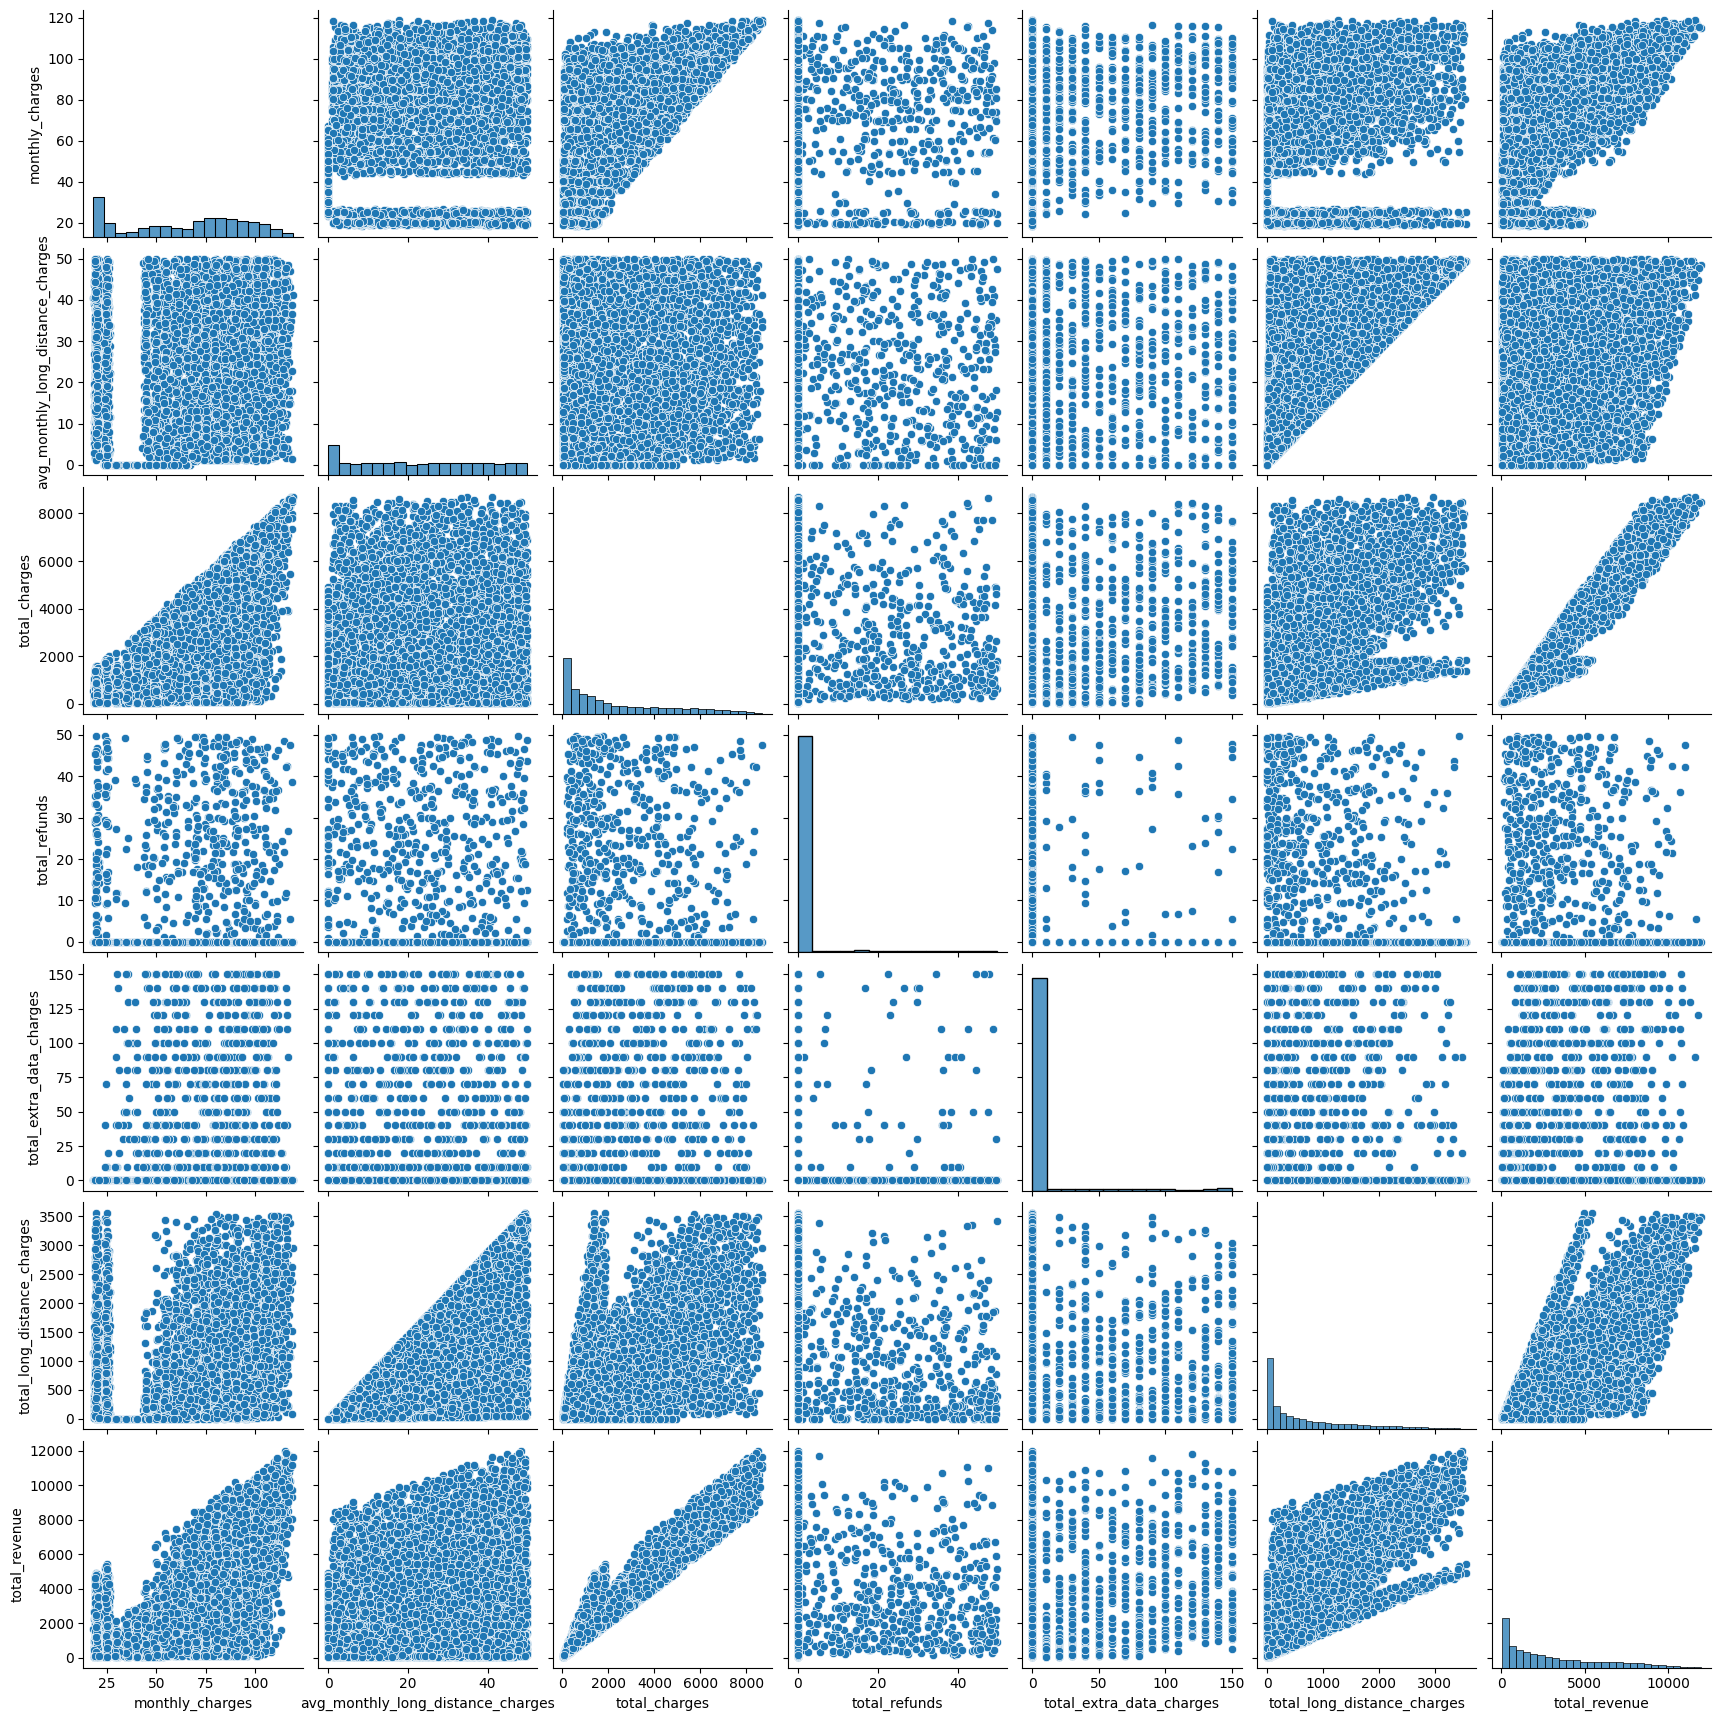

In [11]:
sns.pairplot(df)
plt.show()

In [12]:
df.to_csv(path_or_buf=r'data\clean\payment_method_clean.csv',index=False)

### Análisis exploratorio

#### Análisis univariante

In [13]:
df = pd.read_csv(r"data\clean\payment_method_clean.csv")
df.head()

,customer_id,contract,paperless_billing,payment_method,monthly_charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
0,0002-ORFBO,One Year,Yes,Mailed check,65.6,42.39,593.30,0.00,0,381.51,974.81
1,0003-MKNFE,Month-to-Month,No,Mailed check,59.9,10.69,542.40,38.33,10,96.21,610.28
2,0004-TLHLJ,Month-to-Month,Yes,Electronic check,73.9,33.65,280.85,0.00,0,134.60,415.45
3,0011-IGKFF,Month-to-Month,Yes,Electronic check,98.0,27.82,1237.85,0.00,0,361.66,1599.51
4,0013-EXCHZ,Month-to-Month,Yes,Mailed check,83.9,7.38,267.40,0.00,0,22.14,289.54


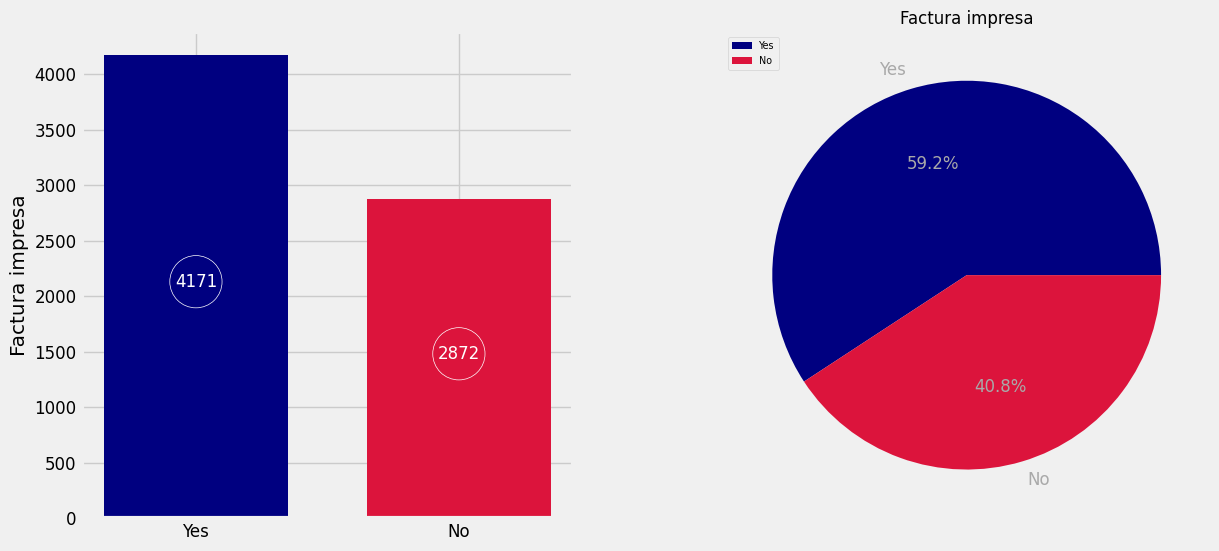

In [14]:
categorical_analyzer = CategoricalAnalysis(df=df)
categorical_analyzer.plot_top_categories(title='Factura impresa', labely='Factura impresa', column_name='paperless_billing')

- Nuestros usuarios prefieren factura impresa que electrónica con un 59,2% del total

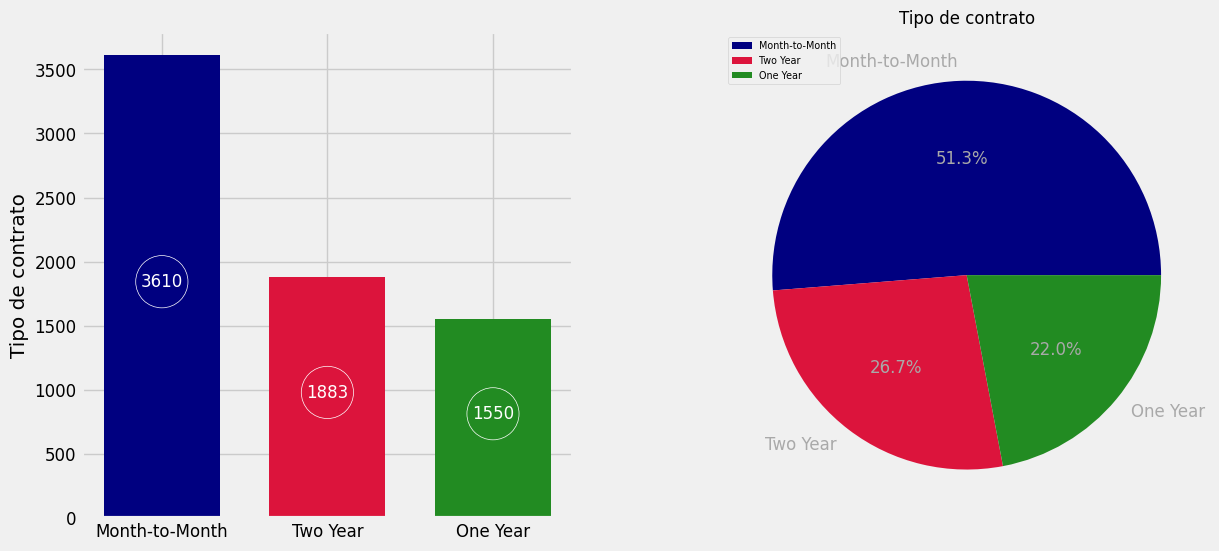

In [15]:
categorical_analyzer.plot_top_categories(title='Tipo de contrato', labely='Tipo de contrato', column_name='contract')

- Con un 51,3% nuestros usuarios solo se encuentran atados en un contrato de mes a mes.

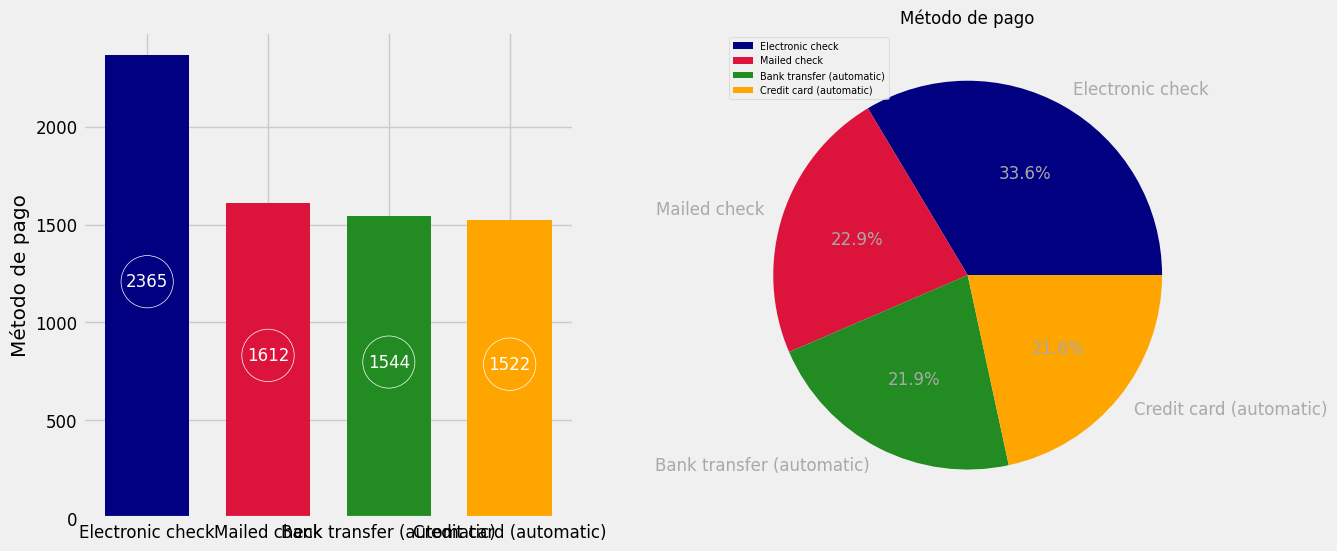

In [16]:
categorical_analyzer.plot_top_categories(title='Método de pago', labely='Método de pago', column_name='payment_method')

- El método de pago más popular es el electrónico con un 33,6% seguido del pago en cheque vía mail.

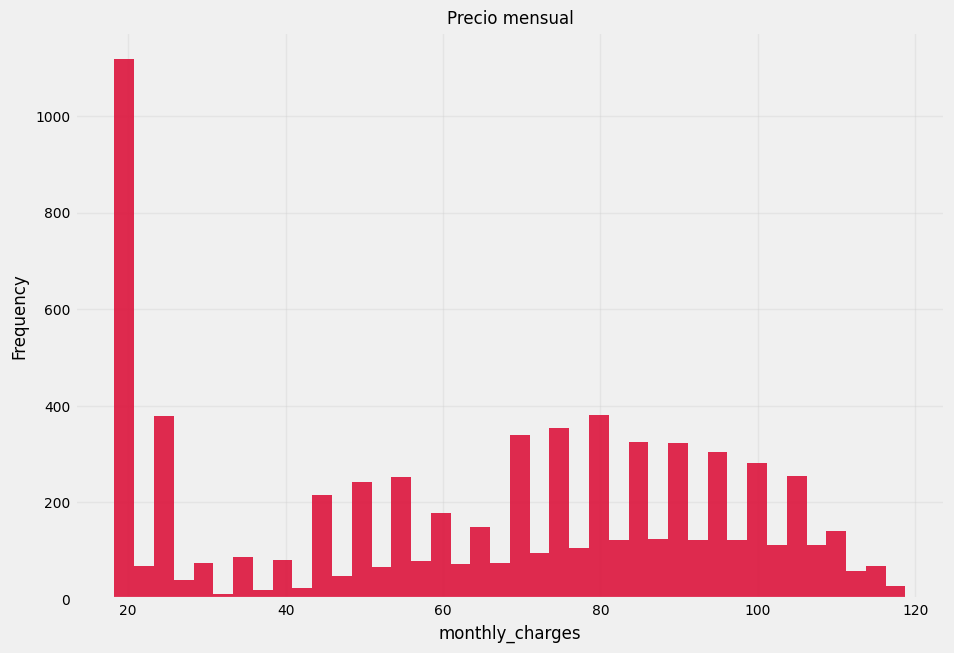

La distribución es platicúrtica con una curtosis de -1.26. Los datos se encuentran dispersos.
La distribución se encuentra sesgada hacia la derecha -0.22.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
monthly_charges,7043.0,64.761692,70.35,20.05,30.09,18.25,35.5,70.35,89.85,118.75,-1.26,-0.22


In [17]:
categorical_analyzer.plot_distribution(title= 'Precio mensual', column_name='monthly_charges', cant_bins = 40, color='crimson', rotation=0, alpha=0.9)

- Los precios mensuales varían entre 18 y 118 dólares, donde la mitad de nuestros usuarios pagan menos de 70 u/o más conteniendo una moda de 20 dólares.

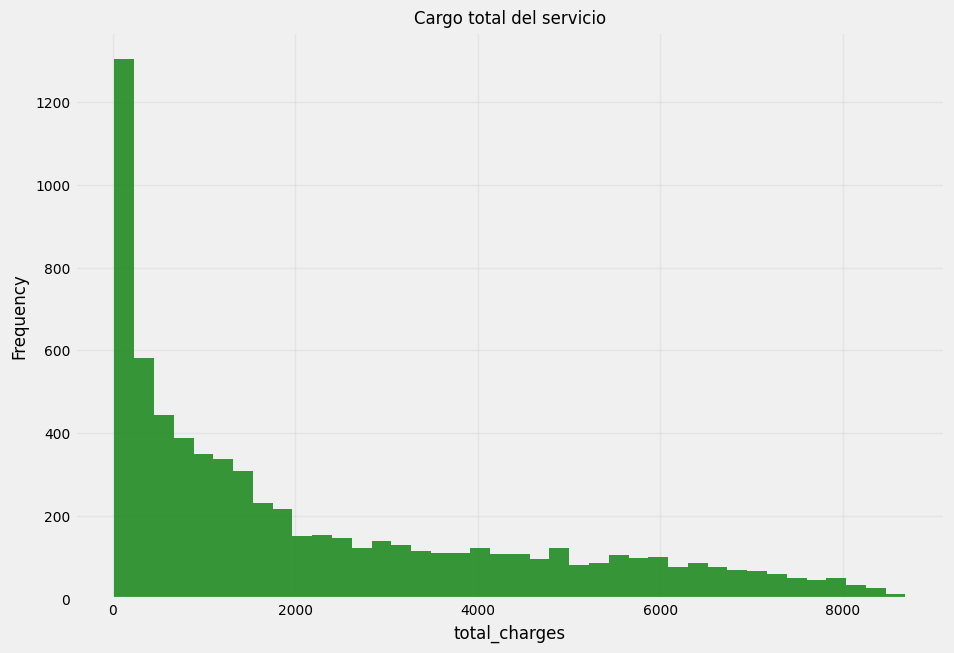

La distribución es platicúrtica con una curtosis de -0.23. Los datos se encuentran dispersos.
La distribución se encuentra sesgada hacia la izquierda 0.96.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
total_charges,7043.0,2280.381264,1394.55,20.2,2266.22,18.8,400.15,1394.55,3786.6,8684.8,-0.23,0.96


In [18]:
categorical_analyzer.plot_distribution(title= 'Cargo total del servicio', column_name='total_charges', cant_bins = 40, color='forestgreen', rotation=0, alpha=0.9)

- Es la suma total del cargo pagado hasta la fecha. Obtenemos desde 18 a 8649 dólares apróximadamente.

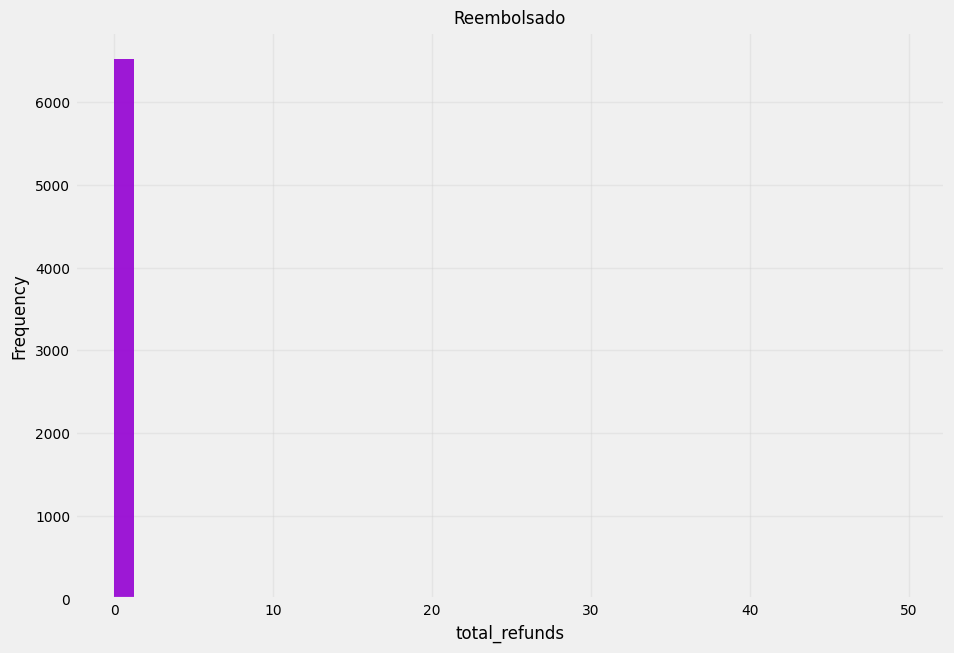

La distribución es leptocúrtica con una curtosis de 18.34. Los datos se encuentran concentrados alrededor de la media.
La distribución se encuentra sesgada hacia la izquierda 4.33.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
total_refunds,7043.0,1.962182,0.0,0.0,7.9,0.0,0.0,0.0,0.0,49.79,18.34,4.33


In [19]:
categorical_analyzer.plot_distribution(title= 'Reembolsado', column_name='total_refunds', cant_bins = 40, color='darkviolet', rotation=0, alpha=0.9)

- Obtenemos tan solo un reembolso de 50 dólares dentro de nuestros usuarios.

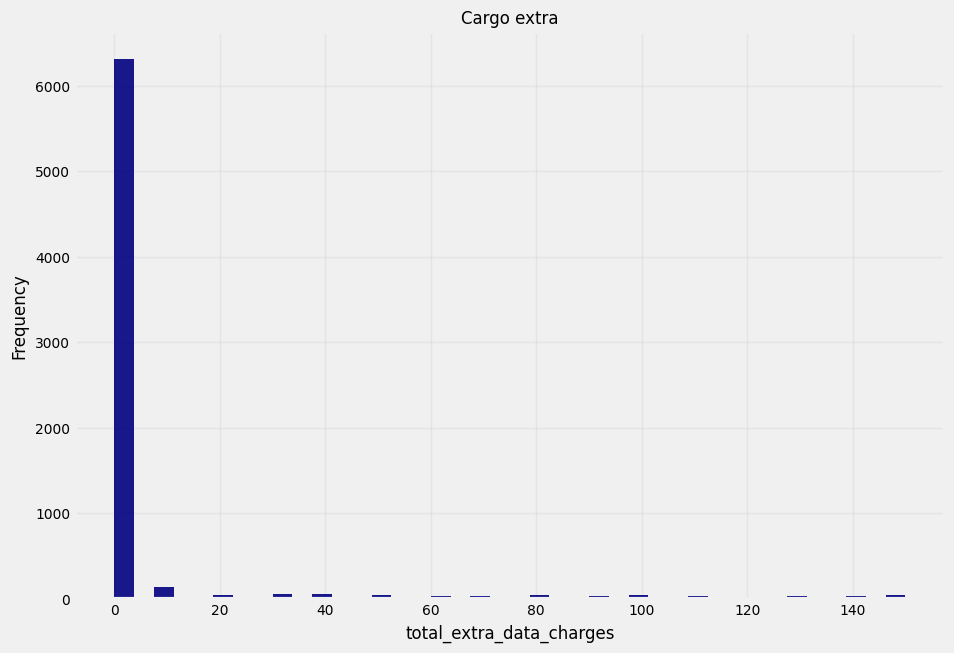

La distribución es leptocúrtica con una curtosis de 16.45. Los datos se encuentran concentrados alrededor de la media.
La distribución se encuentra sesgada hacia la izquierda 4.09.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
total_extra_data_charges,7043.0,6.860713,0.0,0,25.1,0.0,0.0,0.0,0.0,150.0,16.45,4.09


In [20]:
categorical_analyzer.plot_distribution(title= 'Cargo extra', column_name='total_extra_data_charges', cant_bins = 40, color='navy', rotation=0, alpha=0.9)

- L agran mayoría de nuetros uusuarios no superan los límites de nuestros planes.

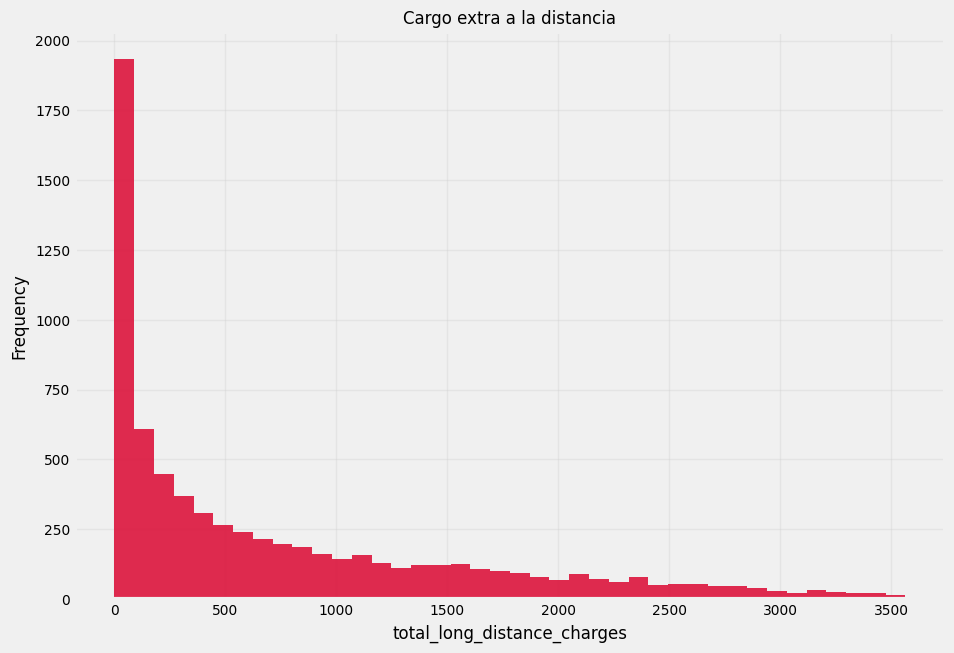

La distribución es leptocúrtica con una curtosis de 0.64. Los datos se encuentran concentrados alrededor de la media.
La distribución se encuentra sesgada hacia la izquierda 1.24.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
total_long_distance_charges,7043.0,749.099262,401.44,0.0,846.66,0.0,70.545,401.44,1191.1,3564.72,0.64,1.24


In [21]:
categorical_analyzer.plot_distribution(title= 'Cargo extra a la distancia', column_name='total_long_distance_charges', cant_bins = 40, color='crimson', rotation=0, alpha=0.9)

- **Descripción**: Representa el promedio mensual de cargos por llamadas de larga distancia para el cliente.

- Dentro de un rango de 70 a 1191 dólares es la carga del mismo a nivel promedio.

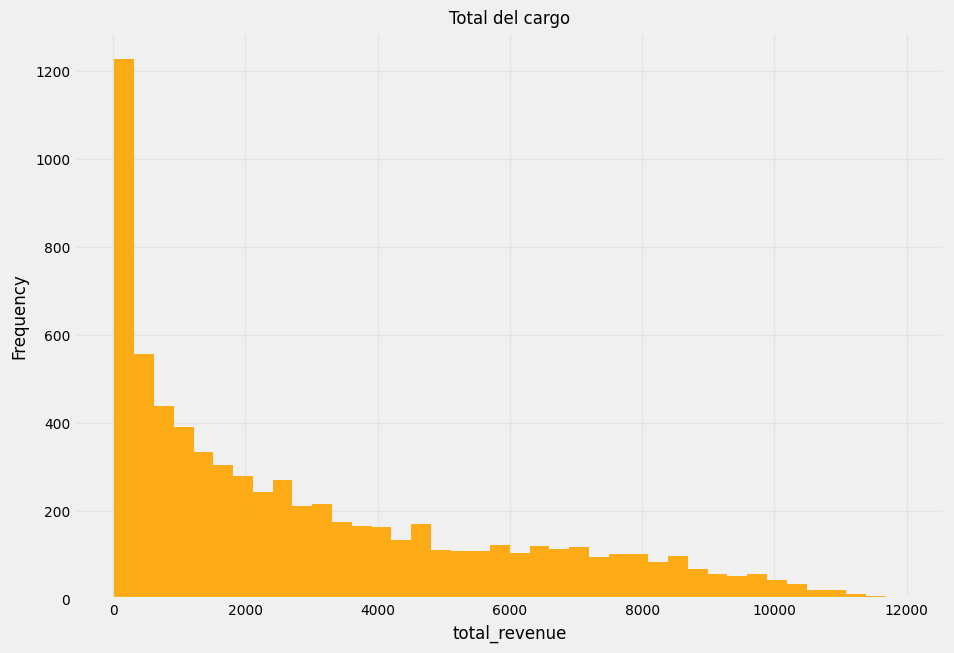

La distribución es platicúrtica con una curtosis de -0.2. Los datos se encuentran dispersos.
La distribución se encuentra sesgada hacia la izquierda 0.92.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
total_revenue,7043.0,3034.379056,2108.64,24.8,2865.2,21.36,605.61,2108.64,4801.145,11979.34,-0.2,0.92


In [22]:
categorical_analyzer.plot_distribution(title= 'Total del cargo', column_name='total_revenue', cant_bins = 40, color='orange', rotation=0, alpha=0.9)

- **Descripción** : Total de ingresos generados por cada cliente hasta la fecha. Se calcula como la suma de:

Total Charges: Pagos acumulados por los servicios contratados.
Total Extra Data Charges: Cargos adicionales por exceder el límite de datos.
Total Long Distance Charges: Cargos adicionales por llamadas de larga distancia.

- Disponemos de un rango mayor entre 21 y 4802 dólares lo que nos da un total de lo generado de nuestros servicios en base a un conjunto de variables.

### Análisis exploratorio basado en el status del cliente.

In [23]:
df1 = pd.read_csv(r"data\clean\status_analysis_clean.csv")
df2 = pd.merge(left = df, right =df1, on ="customer_id")

In [24]:
df2.head()

,customer_id,contract,paperless_billing,payment_method,monthly_charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,cltv,customer_status,churn_label,churn_category,churn_group,razon_abandono
0,0002-ORFBO,One Year,Yes,Mailed check,65.6,42.39,593.30,0.00,0,381.51,974.81,3,2205,Stayed,No,Not Applicable,"[60, 70)",Competitor had better devices
1,0003-MKNFE,Month-to-Month,No,Mailed check,59.9,10.69,542.40,38.33,10,96.21,610.28,5,5414,Stayed,No,Not Applicable,"[60, 70)",Competitor had better devices
2,0004-TLHLJ,Month-to-Month,Yes,Electronic check,73.9,33.65,280.85,0.00,0,134.60,415.45,1,4479,Churned,Yes,Competitor,"[70, 80)",Competitor had better devices
3,0011-IGKFF,Month-to-Month,Yes,Electronic check,98.0,27.82,1237.85,0.00,0,361.66,1599.51,1,3714,Churned,Yes,Dissatisfaction,"[90, 100)",Product dissatisfaction
4,0013-EXCHZ,Month-to-Month,Yes,Mailed check,83.9,7.38,267.40,0.00,0,22.14,289.54,1,3464,Churned,Yes,Dissatisfaction,"[60, 70)",Network reliability



---

### 💡 **1️⃣ Hipótesis 1: El tipo de contrato influye en el churn** 🔄📑  
🔍 **Análisis:** Los clientes con contratos **mes a mes** tienen una mayor tasa de abandono en comparación con los clientes que tienen contratos **anuales o de dos años**.  
📊 **Razón:** Los clientes con contratos largos pueden sentirse más comprometidos con el servicio y menos propensos a cambiar de proveedor, mientras que los de **contrato mensual** tienen mayor flexibilidad para cancelar en cualquier momento.  

---



In [26]:
df2.contract.unique

<bound method Series.unique of 0             One Year
1       Month-to-Month
2       Month-to-Month
3       Month-to-Month
4       Month-to-Month
             ...      
7038          One Year
7039    Month-to-Month
7040    Month-to-Month
7041          Two Year
7042          Two Year
Name: contract, Length: 7043, dtype: object>

Contrato
0 = Monthly , 1 = Yearly ,  2= Two Years

contract        0     1     2
churn_label                  
0            1955  1384  1835
1            1655   166    48

Chi-cuadrado: 1445.2932428377585
Valor p: 0.0


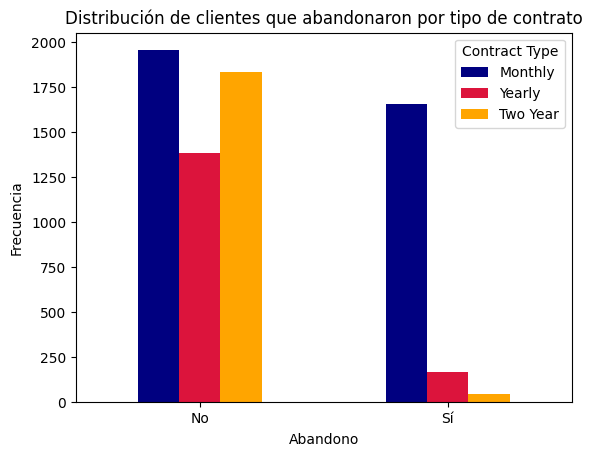

Rechazamos la hipótesis nula: Existe una relación significativa entre 'churn_label' y 'contract'.


In [46]:
from scipy.stats import chi2_contingency

# Reemplazar valores categóricos por numéricos
df2["contract"].replace({'Month-to-Month': 0, 'One Year': 1 , 'Two Year' : 2}, inplace=True)
df2["churn_label"].replace({'Yes': 1, 'No': 0}, inplace=True)

# Crear tabla de contingencia
contingency_table = pd.crosstab(df2['churn_label'], df2['contract'])

# Imprimir tabla de frecuencia
print("Contrato\n0 = Monthly , 1 = Yearly ,  2= Two Years\n")
print(contingency_table)

# Prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)
# Imprimir resultados
print("\nChi-cuadrado:", chi2)
print("Valor p:", p)

ax = contingency_table.plot(kind='bar', stacked=False, color=['navy', 'crimson', 'orange'])
ax.set_title('Distribución de clientes que abandonaron por tipo de contrato')
ax.set_xlabel('Abandono')
ax.set_ylabel('Frecuencia')
ax.set_xticklabels(['No', 'Sí'], rotation=0)
ax.legend(['Monthly', 'Yearly', 'Two Year'], title='Contract Type')

plt.show()

# Evaluar la hipótesis nula
alpha = 0.05
if p < alpha:
    print("Rechazamos la hipótesis nula: Existe una relación significativa entre 'churn_label' y 'contract'.")
else:
    print("No rechazamos la hipótesis nula: No hay suficiente evidencia para concluir que hay una relación significativa entre 'churn_label' y 'contract'.")

##### **📌 Conclusión sobre la relación entre el tipo de contrato y el churn**  

El resultado de la prueba de **chi-cuadrado (χ² = 1445.29, p = 0.0)** indica que existe una **relación estadísticamente significativa** entre el tipo de contrato y el churn.  

- Los clientes con **contratos "Month-to-Month" (0)** presentan una **tasa de churn mucho mayor** (1655 abandonos) en comparación con aquellos con contratos de **un año (1) o dos años (2)**.  
- La cantidad de clientes que abandonaron disminuye drásticamente en contratos más largos: **166 churn en contratos de un año** y **solo 48 en contratos de dos años**.  

##### 🎯 **Interpretación y posibles estrategias:**  

1️⃣ **Falta de fidelización en contratos mensuales:**  
   - Los clientes con contrato **Month-to-Month** no sienten un compromiso a largo plazo, lo que facilita su abandono.  
   - Esto sugiere que pueden ser más sensibles a precios, promociones o calidad del servicio.  

2️⃣ **Opciones para reducir churn:**  
   - Explorar la relación entre el **tipo de servicio contratado y el churn**, ya que ciertos servicios podrían estar impulsando el abandono.  
   - Diseñar una **estrategia de retención** ofreciendo incentivos para que los clientes de contratos mensuales **migran a planes más largos** (descuentos, servicios exclusivos, recompensas por lealtad).  
   - Evaluar la creación de un **plan híbrido** que combine un contrato flexible con beneficios adicionales para retener clientes sin que se sientan "atados".  


---

### **2️⃣ Hipótesis 2: El método de pago está relacionado con el churn** 💳📩  
🔍 **Análisis:** Los clientes que pagan con **cheques electrónicos** tienen una tasa de churn más alta que aquellos que pagan con tarjeta de crédito o débito automático.  
📊 **Razón:** El pago automático facilita la continuidad del servicio y reduce las cancelaciones por olvidos o molestias en el proceso de pago, mientras que los pagos manuales pueden hacer que los clientes reconsideren su gasto mensualmente.  

---


In [54]:
df2['payment_method'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

Mtd. de Pago
'Mailed check' : 0, 'Electronic check' : 1, 'Credit card (automatic)' : 2,'Bank transfer (automatic)' : 3

payment_method     0     1     2     3
churn_label                           
0               1304  1294  1290  1286
1                308  1071   232   258

Chi-cuadrado: 648.1423274814
Valor p: 3.6823546520097993e-140


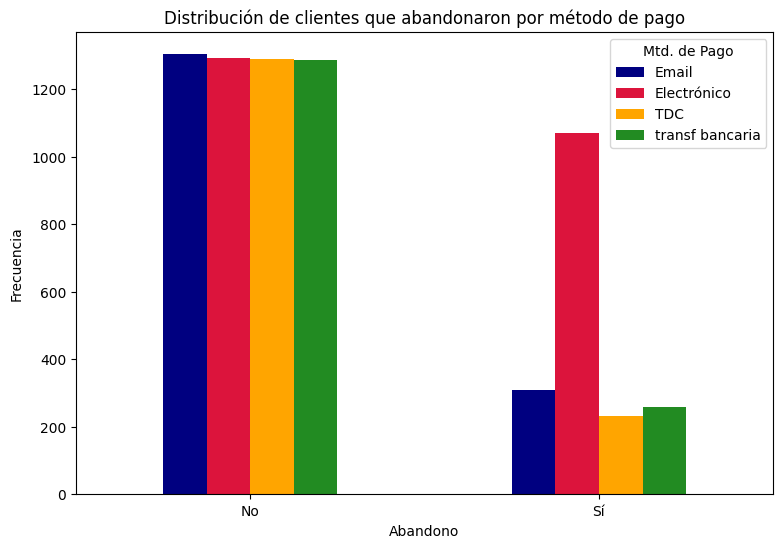

Rechazamos la hipótesis nula: Existe una relación significativa entre 'churn_label' y 'payment_method'.


In [72]:
# Reemplazar valores categóricos por numéricos
df2["payment_method"].replace({'Mailed check' : 0, 'Electronic check' : 1, 'Credit card (automatic)' : 2,
       'Bank transfer (automatic)' : 3}, inplace=True)
df2["churn_label"].replace({'Yes': 1, 'No': 0}, inplace=True)

# Crear tabla de contingencia
contingency_table = pd.crosstab(df2['churn_label'], df2['payment_method'])

# Imprimir tabla de frecuencia
print("Mtd. de Pago\n'Mailed check' : 0, 'Electronic check' : 1, 'Credit card (automatic)' : 2,\
'Bank transfer (automatic)' : 3\n")
print(contingency_table)

# Prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)
# Imprimir resultados
print("\nChi-cuadrado:", chi2)
print("Valor p:", p)

ax = contingency_table.plot(kind='bar', stacked=False, color=['navy', 'crimson', 'orange', 'forestgreen'])

plt.gcf().set_size_inches(9, 6)  # Ajusta el tamaño después de la creación del gráfico

ax.set_title('Distribución de clientes que abandonaron por método de pago')
ax.set_xlabel('Abandono')
ax.set_ylabel('Frecuencia')
ax.set_xticklabels(['No', 'Sí'], rotation=0)
ax.legend(['Email', 'Electrónico', 'TDC', 'transf bancaria'], title='Mtd. de Pago')

plt.show()

# Evaluar la hipótesis nula
alpha = 0.05
if p < alpha:
    print("Rechazamos la hipótesis nula: Existe una relación significativa entre 'churn_label' y 'payment_method'.")
else:
    print("No rechazamos la hipótesis nula: No hay suficiente evidencia para concluir que hay una relación significativa entre 'churn_label' y 'payment_method'.")

##### **Hallazgos principales:**  

✅ **Los pagos automáticos (tarjeta de crédito y transferencia bancaria) tienen la menor tasa de churn**. Esto sugiere que los clientes que optan por pagos automatizados son más propensos a quedarse, posiblemente porque no tienen que preocuparse por realizar el pago manualmente cada mes.  

⚠️ **El "Electronic Check" es el método con más churn**. Esto plantea preguntas sobre su facilidad de uso, confiabilidad o posibles costos adicionales. Puede que no sea tan intuitivo como otros métodos automáticos, lo que lleva a frustraciones y abandono del servicio.  

📌 **Recomendación:**  

Sería útil analizar **por qué los clientes que usan "Electronic Check" abandonan más**. Algunas estrategias para reducir el churn podrían ser:  
- Educar a los clientes sobre cómo usar este método de pago correctamente.  
- Incentivar la migración a opciones más estables como tarjeta de crédito o transferencia bancaria.  
- Evaluar si hay costos ocultos o problemas técnicos con el uso de "Electronic Check".  


---

### 💡 **3️⃣ Hipótesis 3: Pagos totales y relación con la cancelación** 💰📉  
🔍 **Análisis:** Los clientes con **cargos totales más bajos** tienden a tener un churn más alto en comparación con aquellos que han pagado más a lo largo del tiempo.  

---  

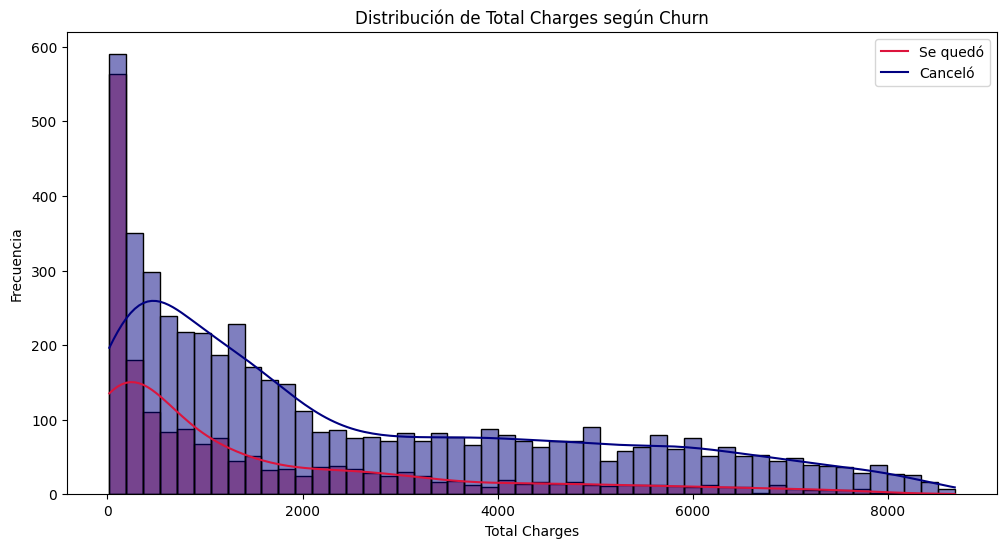

In [ ]:
plt.figure(figsize=(12, 6))

sns.histplot(df2, x='total_charges', hue='churn_label', kde=True, bins=50, palette={0: 'navy', 1: 'crimson'})
plt.title('Distribución de Total Charges según Churn')
plt.xlabel('Total Charges')
plt.ylabel('Frecuencia')
plt.legend(['Se quedó', 'Canceló'])

plt.show()


In [ ]:
df2.groupby('churn_label')['total_charges'].describe()

,count,mean,std,min,25%,50%,75%,max
churn_label,,,,,,,,
0,5174.0,2550.792103,2329.091754,18.80,574.3875,1679.525,4262.85,8672.45
1,1869.0,1531.796094,1890.822994,18.85,134.5000,703.550,2331.30,8684.80


In [75]:
from scipy.stats import mannwhitneyu

churned = df2[df2['churn_label'] == 1]['total_charges']
stayed = df2[df2['churn_label'] == 0]['total_charges']

# Realizar la prueba de Mann-Whitney U
stat, p_value = mannwhitneyu(churned, stayed, alternative='two-sided')

print(f"U-Statistic: {stat}")
print(f"P-Value: {p_value}")

# Evaluar la hipótesis nula
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa en los pagos totales entre los clientes que abandonaron y los que se quedaron.")
else:
    print("No se rechaza la hipótesis nula: No hay suficiente evidencia para decir que los pagos totales influyen en el churn.")


U-Statistic: 3373129.0
P-Value: 7.06946421110085e-84
Rechazamos la hipótesis nula: Hay una diferencia significativa en los pagos totales entre los clientes que abandonaron y los que se quedaron.


##### **📌 Conclusión sobre Total Charges y Churn** 💰📉  

El análisis de la métrica **total_charges** revela una diferencia clara entre los clientes que se quedaron y los que abandonaron:  

🔹 Los clientes que **se quedaron** tienen un pago total **promedio de 2550.79**, mientras que los que **abandonaron** solo alcanzan **1531.79**.  
🔹 La **mediana** también refleja esta brecha: **1679.52** para los que se quedan vs. **703.55** para los que abandonan.  
🔹 La **dispersión (std)** es alta en ambos casos, lo que indica que hay una gran variabilidad en los pagos totales dentro de cada grupo.  


➡️ Un gran porcentaje de clientes que cancelaron su servicio tenían **cargos totales cercanos a 0**, lo que indica que muchos eran **clientes nuevos o de corto plazo**.  

➡️ A medida que los cargos totales aumentan, la proporción de clientes que cancelan disminuye.  

📌 **Confirmación con la visualización:**  
Los clientes con valores más altos de Total Charges se **comportan de manera similar**, ya sea que se queden o cancelen, solo que en menor frecuencia. Esto sugiere que la retención mejora con el tiempo y que los clientes más antiguos (con más pagos acumulados) son menos propensos a cancelar.  

🛠 **Estrategias a considerar:**  
✅ Implementar programas de **fidelización** para clientes nuevos con total_charges bajos.  
✅ Analizar qué servicios contratan los clientes de pagos altos para replicar estrategias en nuevos usuarios.  
✅ Ofrecer promociones o beneficios a clientes con menor facturación total para incentivar la permanencia.  

🚀 **Conclusión final:**  
La relación entre pagos totales y churn es clara: **los clientes con pagos acumulados más bajos son más propensos a abandonar**. Esto refuerza la idea de que **la retención de clientes nuevos** debe ser una prioridad, ya que los clientes con historial de pagos más altos muestran una mayor lealtad al servicio.
